In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Read the dataset

In [2]:
df=pd.read_csv("D:\DoctorVisits - DA.csv")

In [3]:
df.head()


,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


## Removing unnecessary columns

In [4]:
df=df.drop("Unnamed: 0",axis=1)

In [5]:
df.head()

,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [6]:
df.shape

(5190, 12)

In [7]:
df.describe()

,visits,age,income,illness,reduced,health
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000
mean,0.301734,0.406385,0.583160,1.431985,0.861850,1.217534
std,0.798134,0.204782,0.368907,1.384152,2.887628,2.124266
min,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.220000,0.250000,0.000000,0.000000,0.000000
50%,0.000000,0.320000,0.550000,1.000000,0.000000,0.000000
75%,0.000000,0.620000,0.900000,2.000000,0.000000,2.000000
max,9.000000,0.720000,1.500000,5.000000,14.000000,12.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     5190 non-null   int64  
 1   gender     5190 non-null   object 
 2   age        5190 non-null   float64
 3   income     5190 non-null   float64
 4   illness    5190 non-null   int64  
 5   reduced    5190 non-null   int64  
 6   health     5190 non-null   int64  
 7   private    5190 non-null   object 
 8   freepoor   5190 non-null   object 
 9   freerepat  5190 non-null   object 
 10  nchronic   5190 non-null   object 
 11  lchronic   5190 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 486.7+ KB


In [9]:
df.isnull().sum()

visits       0
gender       0
age          0
income       0
illness      0
reduced      0
health       0
private      0
freepoor     0
freerepat    0
nchronic     0
lchronic     0
dtype: int64

## Replacing the columns

In [10]:
df=df.replace(["yes","no"],[1,0])
df['age']=df['age']*100
df['income']=df['income']*100

In [11]:
df.head()

,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,female,19.0,55.0,1,4,1,1,0,0,0,0
1,1,female,19.0,45.0,1,2,1,1,0,0,0,0
2,1,male,19.0,90.0,3,0,0,0,0,0,0,0
3,1,male,19.0,15.0,1,0,0,0,0,0,0,0
4,1,male,19.0,45.0,2,5,1,0,0,0,1,0


## Converting age column into integer data type

In [12]:
df['age']=df['age'].astype(int)

In [13]:
df.head()

,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,female,19,55.0,1,4,1,1,0,0,0,0
1,1,female,19,45.0,1,2,1,1,0,0,0,0
2,1,male,19,90.0,3,0,0,0,0,0,0,0
3,1,male,19,15.0,1,0,0,0,0,0,0,0
4,1,male,19,45.0,2,5,1,0,0,0,1,0


## Total no.of people based on their count of illness

In [14]:
df['illness'].value_counts()

1    1638
0    1554
2     946
3     542
4     274
5     236
Name: illness, dtype: int64

In [15]:
df['gender'].value_counts()

female    2702
male      2488
Name: gender, dtype: int64

In [16]:
df['age'].value_counts()

22    1213
72     822
19     752
27     523
62     316
67     315
32     301
56     273
52     222
47     181
37     146
42     126
Name: age, dtype: int64

## Plotting the count of illness people.

C:\Users\RDO KURNOOL\AppData\Local\Temp\ipykernel_37936\1749992570.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['illness'], color='g')


<Axes: xlabel='illness', ylabel='Density'>

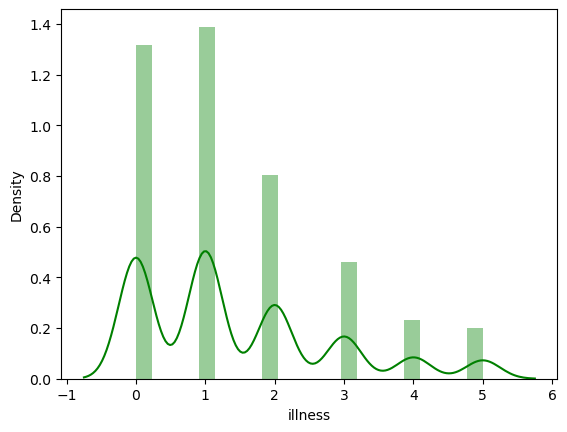

In [17]:
sns.distplot(df['illness'], color='g')

## Visualize and analyze the maximum,minimum and medium income

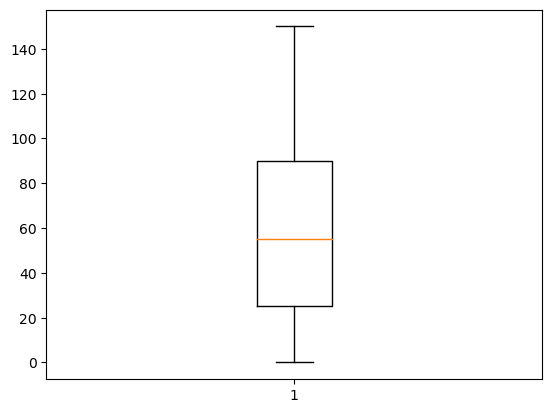

In [18]:
y=list(df.income)
plt.boxplot(y)
plt.show()

## plot to know the count of Male and Female

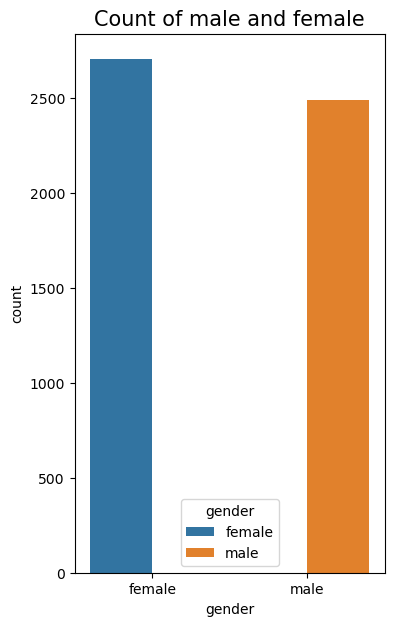

In [19]:
plt.figure(figsize=(4,7))
sns.countplot(x='gender', hue='gender', data=df)
plt.title('Count of male and female', size=15)
plt.show()

## Plot to know the average income by gender

Text(0.5, 1.0, 'Average Income by Gender')

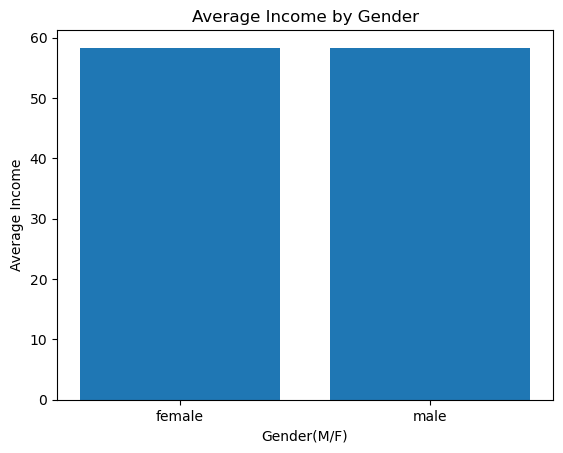

In [20]:
x=df["gender"]
y=df["income"].mean()
plt.bar(x,y)
plt.xlabel("Gender(M/F)")
plt.ylabel("Average Income")
plt.title("Average Income by Gender")

## Plot to know illness count between male and female

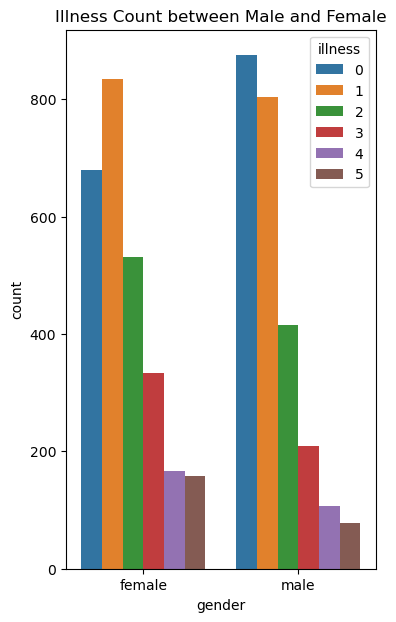

In [21]:
plt.figure(figsize=(4,7))
sns.countplot(x='gender', hue='illness', data=df)
plt.title('Illness Count between Male and Female')
plt.show()

## Plot to know the Income variation between male and female

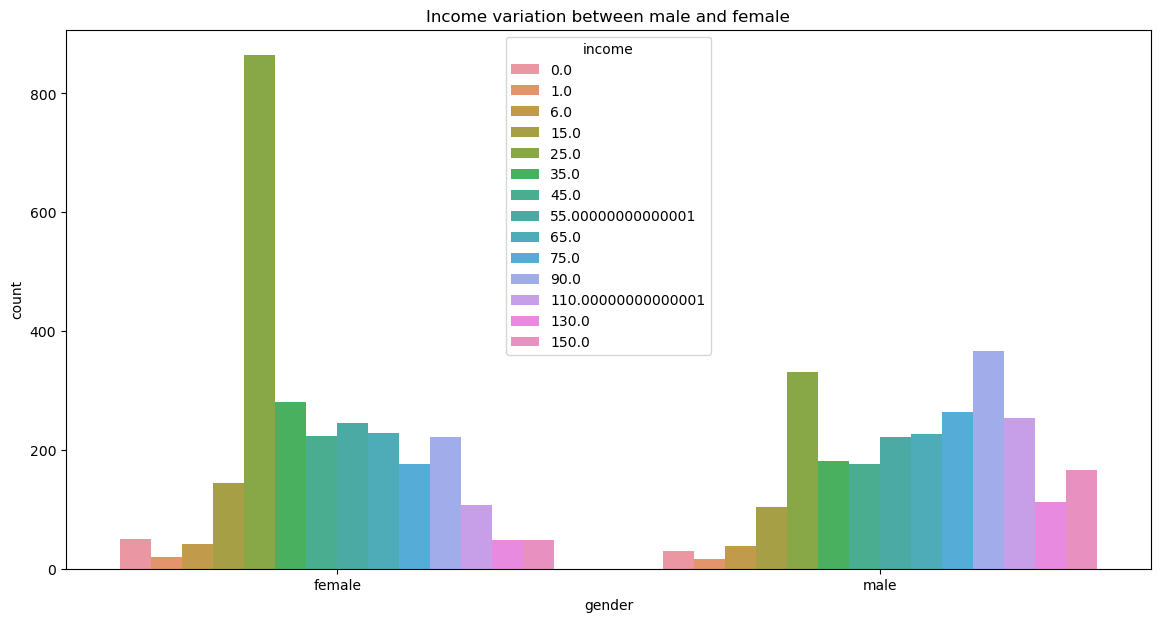

In [22]:
plt.figure(figsize=(14,7))
sns.countplot(x='gender', hue='income', data=df)
plt.title('Income variation between male and female')
plt.show()

## Plot the count of  age for male and female

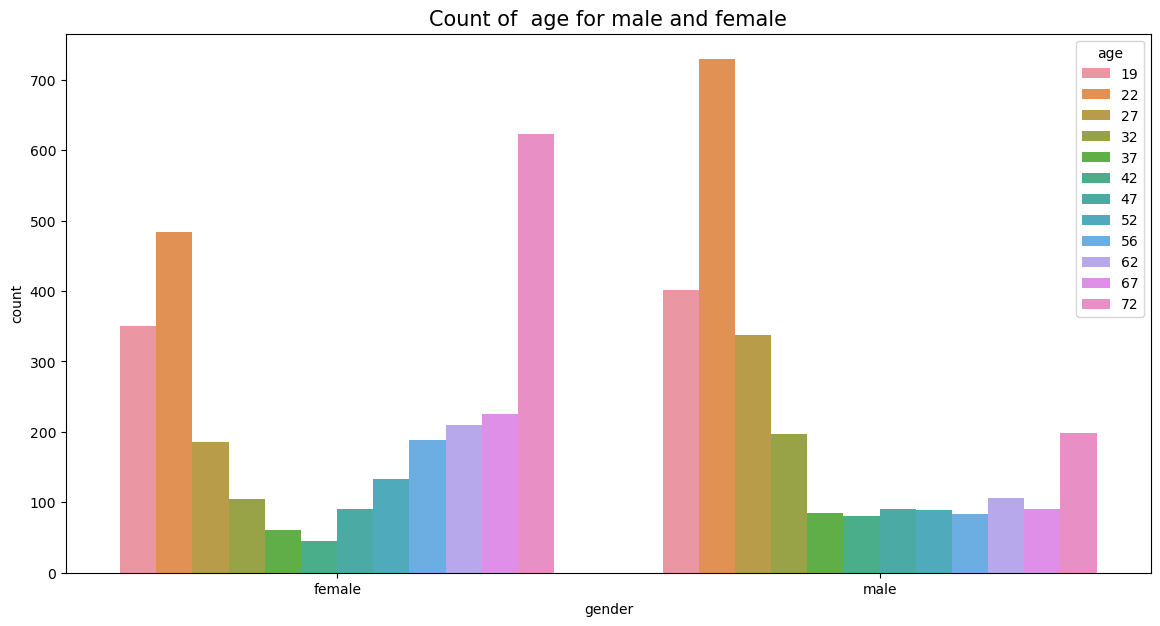

In [23]:
plt.figure(figsize=(14,7))
sns.countplot(x='gender', hue='age', data=df)
plt.title('Count of  age for male and female', size=15)
plt.show()

## Plot for relation between the rate of income and rate of illness

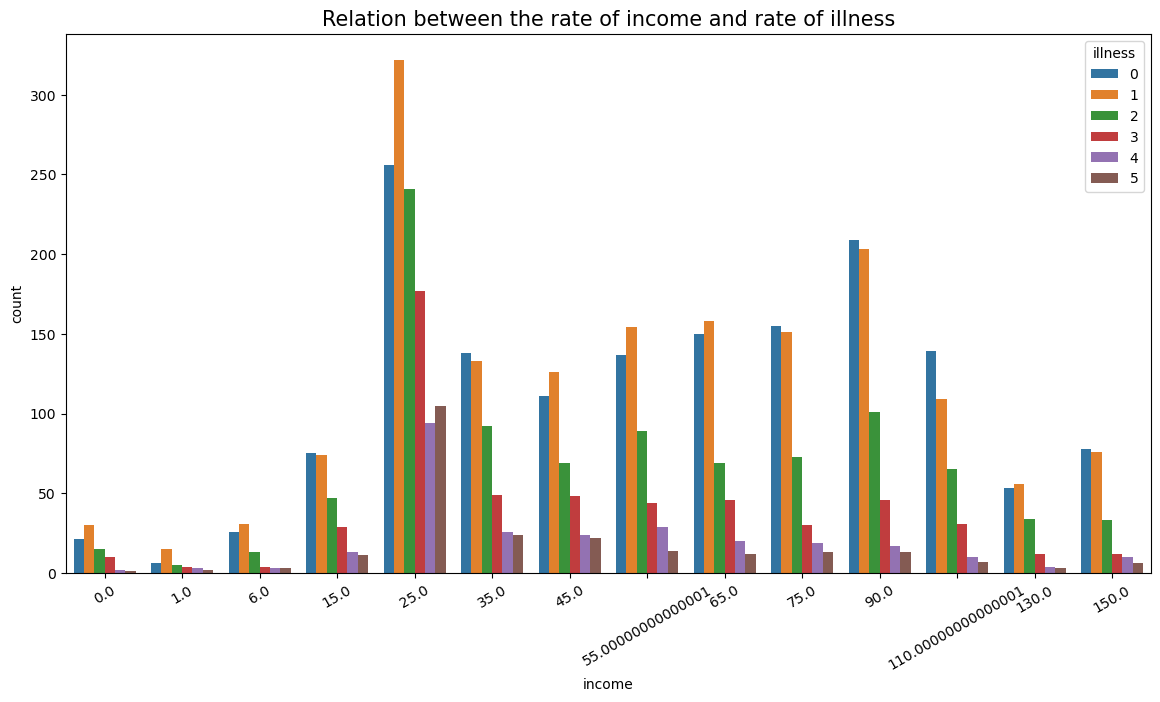

In [24]:
plt.figure(figsize=(14,7))
sns.countplot(x='income', hue='illness', data=df)
plt.xticks(rotation=30)
plt.title('Relation between the rate of income and rate of illness', size=15)
plt.show()

## Plot to show the relation between Age and Income

Text(0.5, 1.0, 'Relation between Age and Income')

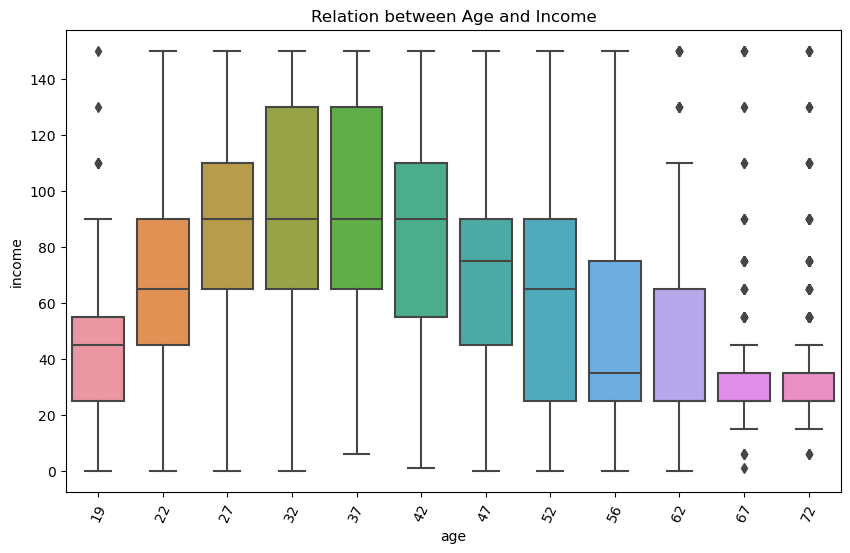

In [25]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='age', y='income', data=df)
plt.setp(ax.artists, alpha=.7, linewidth=2, edgecolor="k")
plt.xticks(rotation=65)
plt.title("Relation between Age and Income")

In [26]:
df.groupby(['gender','reduced']).mean()

visits        age      income   illness    health   private  \
gender reduced                                                                  
female 0        0.229322  46.505908   48.273523  1.462144  1.115098  0.472210   
       1        0.400000  32.526316   54.210526  2.242105  1.610526  0.505263   
       2        0.672727  39.072727   56.018182  2.236364  1.781818  0.545455   
       3        1.333333  40.288889   51.600000  2.733333  1.733333  0.577778   
       4        0.851852  45.740741   46.666667  2.222222  2.074074  0.555556   
       5        1.444444  40.111111   61.444444  2.222222  2.500000  0.444444   
       6        1.363636  42.454545   62.272727  2.363636  1.363636  0.181818   
       7        1.384615  43.538462   47.346154  2.653846  2.230769  0.538462   
       8        1.090909  47.000000   40.454545  2.181818  4.000000  0.181818   
       9        0.500000  56.000000   82.500000  3.000000  1.000000  0.500000   
       10       2.142857  51.142857   42.142857  2.571429  2.000000  0.428571   
       12       2.000000  72.000000   25.000000  3.500000  5.500000  1.000000   
       13       4.000000  72.000000   30.000000  4.500000  3.500000  1.000000   
       14       1.543103  55.112069   42.758621  2.534483  4.112069  0.318966   
male   0        0.136007  34.437990   69.439834  1.099585  0.924850  0.409405   
       1        0.304878  28.609756   67.634146  1.743902  1.256098  0.524390   
       2        0.471698  34.264151   65.301887  2.358491  1.547170  0.433962   
       3        0.724138  33.413793   74.137931  2.137931  1.689655  0.413793   
       4        0.722222  30.833333   86.944444  2.055556  2.000000  0.500000   
       5        1.136364  33.181818   57.045455  2.272727  2.818182  0.500000   
       6        0.833333  34.000000   59.166667  2.500000  2.000000  0.333333   
       7        0.750000  31.416667   65.500000  2.583333  4.333333  0.416667   
       8        1.333333  36.333333   83.333333  2.666667  2.000000  0.333333   
       9        2.200000  30.800000   39.200000  2.400000  2.000000  0.400000   
       10       1.800000  47.800000   59.000000  2.600000  4.600000  0.000000   
       11       5.000000  32.000000  100.000000  1.500000  0.500000  0.500000   
       12       2.000000  36.750000   51.500000  1.500000  1.000000  0.250000   
       13       4.000000  51.000000   35.000000  3.333333  2.333333  0.333333   
       14       1.555556  47.652778   59.861111  2.375000  3.527778  0.402778   

                freepoor  freerepat  nchronic  lchronic  
gender reduced                                           
female 0        0.030635   0.303282  0.475711  0.098468  
       1        0.063158   0.126316  0.568421  0.168421  
       2        0.036364   0.200000  0.527273  0.181818  
       3        0.066667   0.244444  0.422222  0.222222  
       4        0.000000   0.259259  0.333333  0.222222  
       5        0.111111   0.166667  0.555556  0.166667  
       6        0.000000   0.454545  0.363636  0.272727  
       7        0.000000   0.230769  0.423077  0.269231  
       8        0.000000   0.454545  0.363636  0.454545  
       9        0.000000   0.500000  1.000000  0.000000  
       10       0.000000   0.428571  0.428571  0.285714  
       12       0.000000   0.000000  0.500000  0.500000  
       13       0.000000   0.000000  0.000000  1.000000  
       14       0.008621   0.517241  0.448276  0.431034  
male   0        0.054864   0.110650  0.321807  0.088981  
       1        0.036585   0.036585  0.378049  0.097561  
       2        0.056604   0.037736  0.301887  0.245283  
       3        0.103448   0.068966  0.379310  0.137931  
       4        0.000000   0.000000  0.222222  0.166667  
       5        0.090909   0.090909  0.318182  0.181818  
       6        0.000000   0.000000  0.500000  0.333333  
       7        0.083333   0.083333  0.333333  0.250000  
       8        0.000000   0.166667  0.333333  0.000000  
       9        0.200000   0.000000  0.400000  0.200000 

## Visualize is there any missing value based on heat map

<Axes: >

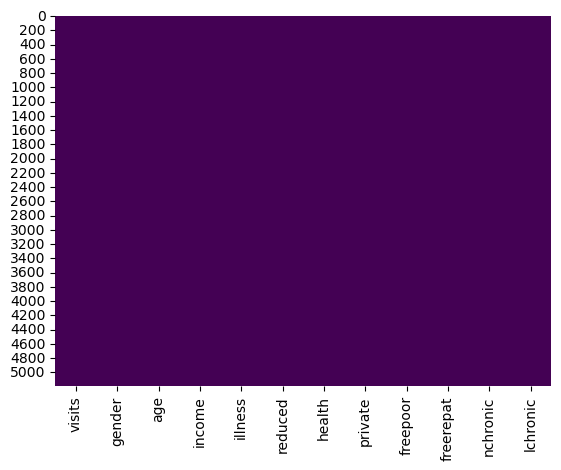

In [27]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

## Heatmap for correlation between the attributes

C:\Users\RDO KURNOOL\AppData\Local\Temp\ipykernel_37936\2102770428.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar=True,annot=True,fmt=".2f",cmap="crest",linewidth=0.6)


<Axes: >

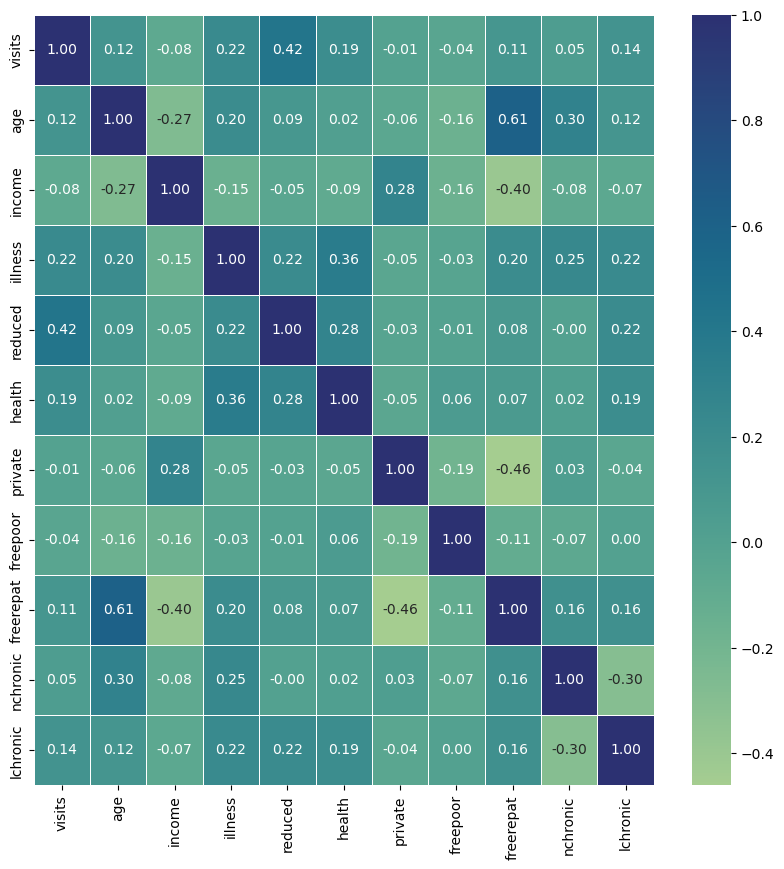

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,fmt=".2f",cmap="crest",linewidth=0.6)

## Scatter Plot to know the relation between income and visits

Text(0, 0.5, 'Visits')

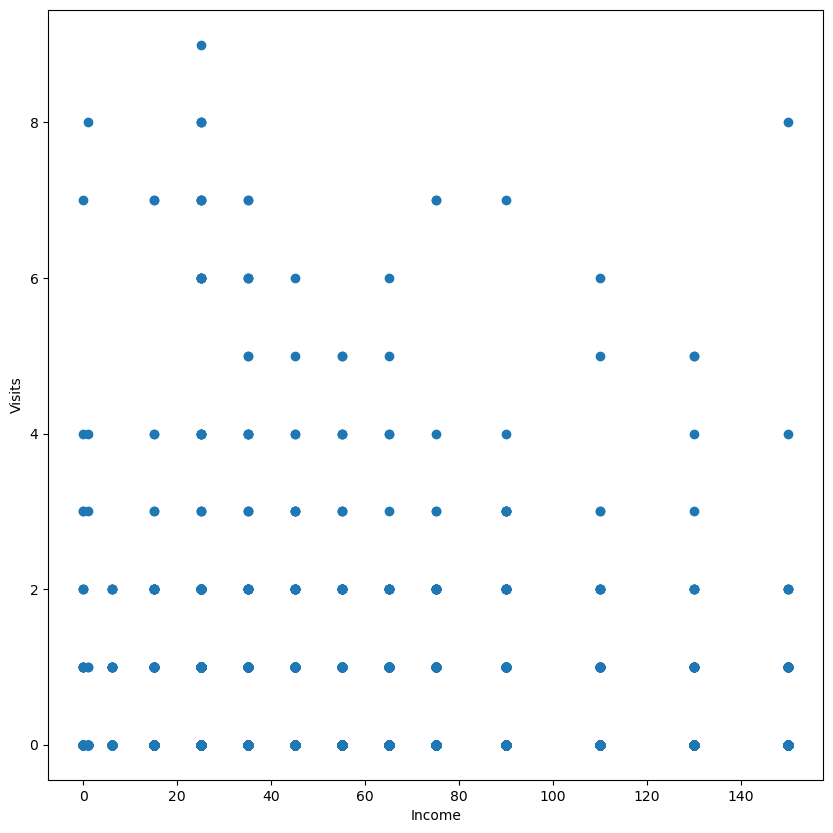

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(x='income',y='visits',data=df)
plt.xlabel('Income')
plt.ylabel('Visits')

## Count and visualize the no.of males and females affected by illness

<Axes: xlabel='gender', ylabel='Count'>

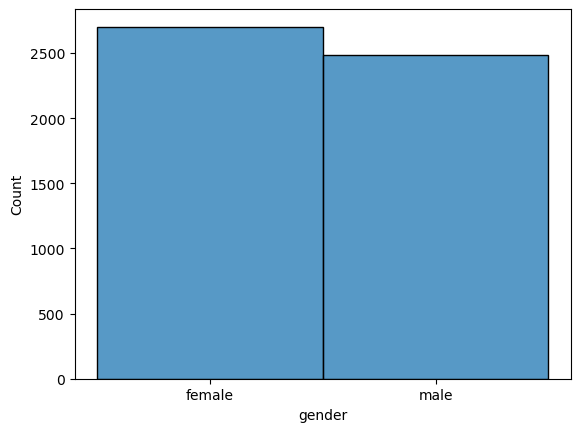

In [30]:
sns.histplot(df.gender,bins=2)

## Visualize the percentage of people getting government health insurance due to low income and old age and also who is having private health insurance

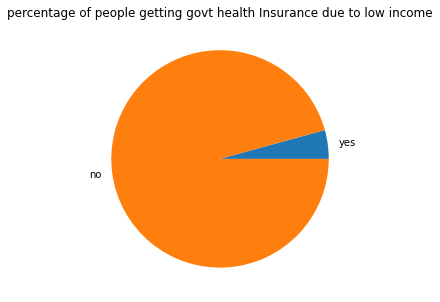

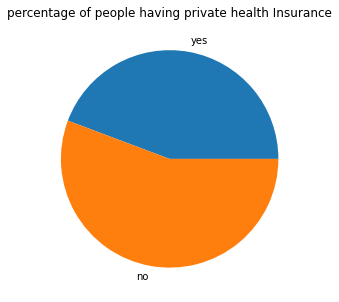

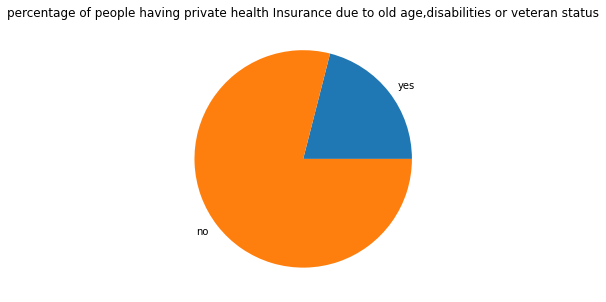

In [22]:
label=['yes','no']
Y=df[df['freepoor']=='yes']
N=df[df['freepoor']=='no']
x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("percentage of people getting govt health Insurance due to low income")
plt.show()
#percentage of people having private insurance
Y=df[df['private']=='yes']
N=df[df['private']=='no']
x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("percentage of people having private health Insurance")
plt.show()
#percentage of people having private health Insurance due to old age,disabilities or veteran status
Y=df[df['freerepat']=='yes']
N=df[df['freerepat']=='no']
x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("percentage of people having private health Insurance due to old age,disabilities or veteran status")
plt.show()

## Horizontal bar chart to analyze the reduced days of activities due to illness based on gender

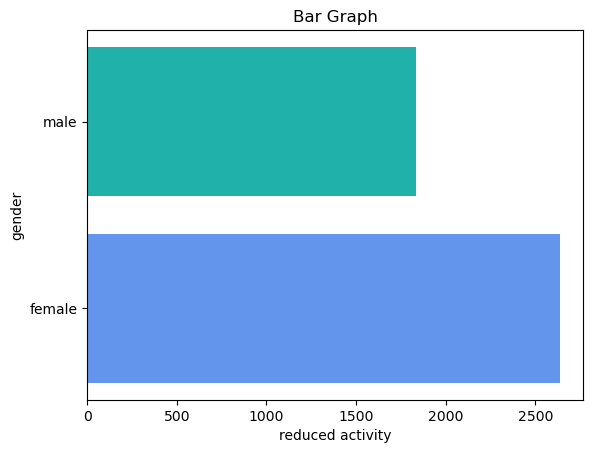

In [31]:
db=df.groupby('gender')['reduced'].sum().to_frame().reset_index()
plt.barh(db['gender'],db['reduced'],color=['cornflowerblue','lightseagreen'])
plt.title('Bar Graph')
plt.xlabel('reduced activity')
plt.ylabel('gender')
plt.show()